In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate

# Лабораторная работа №1. Питон для математиков.

# Создание матрицы. Вычисление определителя.

1. Создать матрицу 5x5 случайных целых чисел принадлежащих отрезку [0, 10]. Вычислить ее определитель.

In [ ]:
A = np.random.randint(0,10,(5, 5))
print(A)

[[9 3 6 9 7]
 [7 8 1 3 7]
 [4 0 6 9 8]
 [8 7 3 3 2]
 [3 0 1 5 8]]


In [ ]:
np.linalg.det(A)

1.999999999999995

# Умножение матриц

In [ ]:
B = np.array([2, 4, 3], int)
C = np.array([[1, 2, 0], [1, 2, 1], [1, 1, 1]], int)
D = np.dot(B, C)
print('B=', B)
print('C=', C)
print('B*C=', D)

B= [2 4 3]
C= [[1 2 0]
 [1 2 1]
 [1 1 1]]
B*C= [ 9 15  7]


# Решение системы линейных уравнений.

In [ ]:

M2 = np.array([[1, 2, 0], [1, 2, 1], [1, 1, 1]], int) # Матрица (левая часть системы)
v2 = np.array([2, 4, 3], int) # Вектор (правая часть системы)

np.linalg.solve(M2, v2)

array([0., 1., 2.])

# Вычисление интеграла с помощью SciPy

Вычислите интеграл $$\int _1 ^2 (x+1) dx$$

In [ ]:

integrate.quad(lambda x:(x+1), 1, 2)


(2.5, 2.7755575615628914e-14)

Вычислите интеграл $$ \int _1 ^2 x^ {\frac 3 4} dx$$

In [ ]:

integrate.quad(lambda x: math.pow(x, 0.75), 1, 2)

(1.350620377722776, 1.499489840875752e-14)

Вычислите интеграл $$ \int _1 ^\infty {\frac {1}{\sqrt x}} dx$$
P.S. Что пошло не так при вычислении этого интеграла?

In [ ]:
integrate.quad(lambda x: math.pow(x, -0.5), 1, np.inf)

<ipython-input-8-cc5e0b8a65ec>:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrate.quad(lambda x: math.pow(x, -0.5), 1, np.inf)


(-1.9999999999999907, 5.575540029667536e-13)

Вычисление кратного интеграла:
$$\int_1^2\int_1^x {xy}dxdy$$
Функция dblquad. Первый параметр функции dblquad должен быть f (x, y) (подинтегральная функция) , второй и  третий - числа, внешние пределы интеграрования , четвертый и пятый -  g (x), h (x) - функции, внутренние пределы интегрирования.

In [ ]:

def f(x, y):
    return x * y
def h(x):
    return x
v, err = integrate.dblquad(f, 1, 2, lambda x: 1, h)

print(v)

1.125


#БИБЛИОТЕКА SYMPY  - символьные вычисления

In [ ]:
import sympy as sm
#введу переменную x
x = sm.Symbol('x')
# введем ДВЕ переменные x И z
y, z = sm.symbols('y, z')

In [ ]:
#создаю выражение
a = (3*x +5*y**2)/z
#обратите внимание как красиво без функции принт!
a

(3*x + 5*y**2)/z

In [ ]:
#преобразование выражений
b = (sm.sqrt(3)* x + 8*y)*(3*z - 9*y)
b

(-9*y + 3*z)*(sqrt(3)*x + 8*y)

In [ ]:
#не используйтте принт!!!
b.expand()

-9*sqrt(3)*x*y + 3*sqrt(3)*x*z - 72*y**2 + 24*y*z

In [ ]:
#производная по z
sm.diff(b,z)

3*sqrt(3)*x + 24*y

In [ ]:
#вычислим интеграл от одной переменной
#сначала его создадим
myintegr = sm.Integral(x**3+2*x-sm.sin(x), x)
myintegr

Integral(x**3 + 2*x - sin(x), x)

In [ ]:
#вычислим интеграл
myintegr.doit()

x**4/4 + x**2 + cos(x)

In [ ]:
#определенный интеграл
sm.integrate(x**3+2*x-sm.sin(x),(x,0,7))

cos(7) + 2593/4

# Построение графиков функций с помощью Mathplotlib

Построить в одной системе координат графики функций: y = cos(x) + 2, y = -x + 2
Оси координат должны быть подписаны, графики должны быть разного цвета, должна быть выведена легенда.


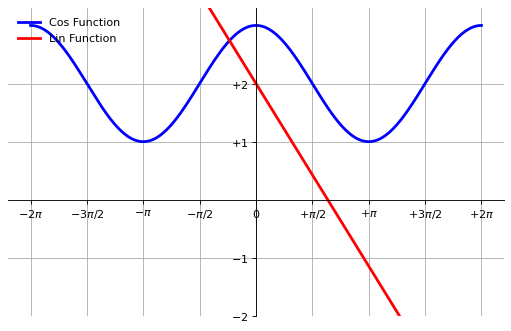

In [ ]:
#про стрелки можно прочитать здесь:
#https://translated.turbopages.org/proxy_u/en-ru.ru.f4e3ce52-64cbf906-6a936b2a-74722d776562/https/stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip

# Создание объектов артборда и холста

plt.figure(figsize=(8, 5), dpi=80)
ax = plt.subplot(111)

# Мы решили удалить правую и верхнюю прямоугольные границы
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


# Установить направление данных на координатной оси
 # 0 согласуется с нашей общей декартовой системой координат, 1 - противоположность
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))


# Подготовить данные, использовать распаковку последовательности

X = np.linspace(-2*np.pi, 2*np.pi, 256, endpoint=True)
C, L = np.cos(X)+2, -X+2

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="Cos Function")
plt.plot(X, L, color="red", linewidth=2.5, linestyle="-", label="Lin Function")



plt.xlim(X.min() * 1.1, X.max() * 1.1)

# Изменить метку на оси координат
plt.xticks([-2*np.pi, -3*np.pi / 2, -np.pi, -np.pi / 2, 0, np.pi / 2, np.pi, 3*np.pi / 2, 2*np.pi ],
           [r'$-2\pi$', r'$-3\pi/2$', r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$', r'$+3 \pi/2$', r'$+ 2\pi$' ])

plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.yticks([-2, -1, +1, +2],
           [r'$-2$', r'$-1$', r'$+1$', r'$+2$'])


#добавляем точку
ax.scatter(x=105, y=110, c='g')

plt.legend(loc='upper left', frameon=False)
plt.grid()
plt.show()